lidar subdir has the files
- *line.data.mat have "raw" data but includes some filtering and water level extraction
- *line.science.mat have processed data
-  Some jpg are also provide

In [1]:
%ls lidar

20150927-0000-01.FRFNProp.line.data.mat*
20150927-0000-01.FRFNProp.line.science.mat*
20150928-1700-01.FRFNProp.line.data.mat*
20150928-1700-01.FRFNProp.line.science.mat*
20150928-2300-01.FRFNProp.line.data.mat*
20150928-2300-01.FRFNProp.line.science.mat*
ForeshoreWater_20150927-0000-01.FRFNProp.line.rxp.jpg*
ForeshoreWater_20150928-1700-01.FRFNProp.line.rxp.jpg*
ForeshoreWater_20150928-2300-01.FRFNProp.line.rxp.jpg*
InstantLinescan_20150927-0000-01.FRFNProp.line.rxp.jpg*
InstantLinescan_20150928-1700-01.FRFNProp.line.rxp.jpg*
InstantLinescan_20150928-2300-01.FRFNProp.line.rxp.jpg*
ProcessedPtPlot_20150927-0000-01.FRFNProp.line.rxp.jpg*
ProcessedPtPlot_20150928-1700-01.FRFNProp.line.rxp.jpg*
ProcessedPtPlot_20150928-2300-01.FRFNProp.line.rxp.jpg*
QuickPtPlot_20150927-0000-01.FRFNProp.line.rxp.jpg*
QuickPtPlot_20150928-1700-01.FRFNProp.line.rxp.jpg*
QuickPtPlot_20150928-2300-01.FRFNProp.line.rxp.jpg*
WaveRunup_20150927-0000-01.FRFNProp.line.rxp.jpg*
WaveRunup_20150928-1700-01.FRFNProp.li

Recent matlab files are just hdf5, which we can get from pytables

In [2]:
import tables
lineData = tables.openFile(r"lidar/20150927-0000-01.FRFNProp.line.data.mat","r")
#science = tables.openFile(r"lidar/20150927-0000-01.FRFNProp.line.science.mat","r")

Grab the filtered  water levels on the grid in FRF coordinates

In [12]:
for f in lineData.root:
    for g in f:
        print g

/lineCoredat/Hz (Array(1, 1)) ''
/lineCoredat/downLineDistance (CArray(1551, 1), zlib(3)) ''
/lineCoredat/downLineX (CArray(1551, 1), zlib(3)) ''
/lineCoredat/downLineXstd (CArray(1551, 1), zlib(3)) ''
/lineCoredat/downLineY (CArray(1551, 1), zlib(3)) ''
/lineCoredat/downLineYstd (CArray(1551, 1), zlib(3)) ''
/lineCoredat/downlineDistStd (CArray(1551, 1), zlib(3)) ''
/lineCoredat/lineFit (Group) ''
/lineCoredat/offlineDist (CArray(1551, 1), zlib(3)) ''
/lineCoredat/offlineDistStd (CArray(1551, 1), zlib(3)) ''
/lineCoredat/tGPSVector (EArray(12782, 1), zlib(3)) ''
/lineCoredat/tGPSVectorRange (Group) ''
/lineGriddedFilteredData/foreshoreGridFiltered (EArray(1551, 12782), zlib(3)) ''
/lineGriddedFilteredData/waterGridFiltered (EArray(1551, 12782), zlib(3)) ''
/lineRawRectifiedNoiseFilter/isNoise (EArray(3845, 12782), zlib(3)) ''
/lineRunupCalc/QAQCmeta (Group) ''
/lineRunupCalc/Z (EArray(12782, 1), zlib(3)) ''
/lineRunupCalc/downLineIndex (EArray(1, 12782), zlib(3)) ''
/lineRunupCalc/dow

In [13]:
z = lineData.root.lineGriddedFilteredData.waterGridFiltered[:]
x = lineData.root.lineCoredat.downLineX[:]

In [14]:
%matplotlib notebook
from matplotlib  import pyplot as plt

<IPython.core.display.Javascript object>


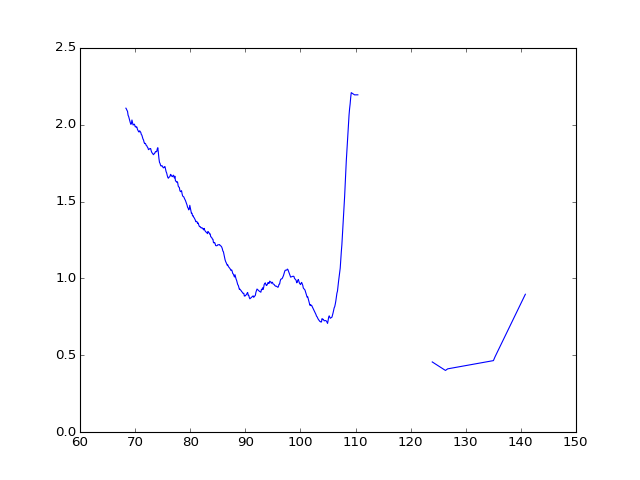

In [15]:
fig = plt.figure()
plt.plot(x,z[:,5000])

data file has nan's where it is  unreliable, find the index for about 105m offshore

In [9]:
import numpy as  np
xfinite = x[:]
xfinite[np.isnan(x)] = -1000.0
i105 = np.where(xfinite > 105.0)[0][0]
print i105

622


<IPython.core.display.Javascript object>


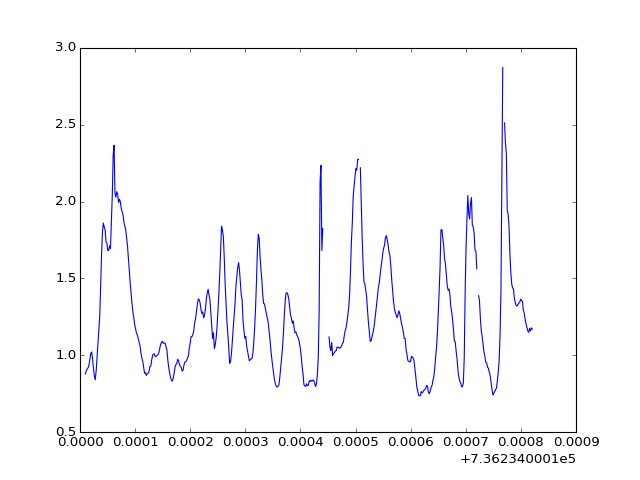

In [18]:
fig = plt.figure()
plt.plot(lineData.root.lineCoredat.tGPSVector[:500],z[i105,:500])